## Problem Statement

The project aims to analyze and derive actionable insights from a Myntra e-commerce dataset. Focused on data exploration, cleaning, and extensive exploratory data analysis (EDA), the project addresses the need to understand the relationships between product prices and MRP, identify popular products, analyze pricing and rating distributions, and explore key sellers on the platform. The overarching goal is to provide a comprehensive understanding of Myntra's e-commerce landscape, enabling informed decision-making and strategic planning for the platform.


In [2]:
#importing dependencies 

import pandas as pd                     #importing pandas 
import numpy as np                      #importing numpy
import matplotlib.pyplot as plt         #matplot for plotting data
import seaborn as sns                   #import seaborn             

In [3]:
#loading the dataframe 

data = pd.read_csv('/Users/najir/Documents/Data Analysis /Projects/Myntra/myntra202305041052.csv', encoding_errors='ignore')

data.head()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...


### **Data Exploration and Pre Pocessing**

In [4]:
#checking datashape

data.shape

(1060213, 11)

In [5]:
#checking columns

data.columns

Index(['id', 'name', 'img', 'asin', 'price', 'mrp', 'rating', 'ratingTotal',
       'discount', 'seller', 'purl'],
      dtype='object')

In [7]:
#checking data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060213 entries, 0 to 1060212
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1060213 non-null  int64  
 1   name         1060213 non-null  object 
 2   img          1060213 non-null  object 
 3   asin         1060213 non-null  object 
 4   price        1060213 non-null  float64
 5   mrp          1060213 non-null  float64
 6   rating       1060213 non-null  float64
 7   ratingTotal  1060213 non-null  int64  
 8   discount     1060213 non-null  int64  
 9   seller       1060213 non-null  object 
 10  purl         1060213 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 89.0+ MB


In [8]:
#checking last 5 column

data.tail()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl
1060208,1060209,Men Slim Tapered Fit Jeans,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,1199.0,2399.0,4.3,44,50,Flying Machine,https://www.myntra.com/jeans/flying-machine/fl...
1060209,1060210,Men Skinny Fit Jeans,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,574.0,2299.0,3.8,34,75,Mast & Harbour,https://www.myntra.com/jeans/mast--harbour/mas...
1060210,1060211,Men Printed Shorts,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,799.0,1599.0,3.9,8,50,WROGN ACTIVE,https://www.myntra.com/shorts/wrogn-active/wro...
1060211,1060212,Men Skinny Fit Jeans,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,1199.0,1999.0,3.8,592,40,Roadster,https://www.myntra.com/jeans/roadster/roadster...
1060212,1060213,Men Jeans,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,835.0,2199.0,0.0,0,62,IVOC,https://www.myntra.com/jeans/ivoc/ivoc-men-bla...


#### **Droppping Column which are not important**  
-   asin
-   id
- img
-   purl


In [9]:
#dropping column which are not importing 

df = data.drop(['img', 'asin', 'purl', 'id'], axis=1)               #dropping column level

df.head()

,name,price,mrp,rating,ratingTotal,discount,seller
0,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,59,Difference of Opinion
1,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,45,Roadster
2,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,54,DILLINGER
3,Typography Print T-shirt,296.0,1099.0,4.0,18400,73,Huetrap
4,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,45,Roadster


In [10]:
#checking for null values

df.isnull().sum()

name           0
price          0
mrp            0
rating         0
ratingTotal    0
discount       0
seller         0
dtype: int64

### **Exploratory Data Analysis**

In [11]:
df.columns

Index(['name', 'price', 'mrp', 'rating', 'ratingTotal', 'discount', 'seller'], dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060213 entries, 0 to 1060212
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   name         1060213 non-null  object 
 1   price        1060213 non-null  float64
 2   mrp          1060213 non-null  float64
 3   rating       1060213 non-null  float64
 4   ratingTotal  1060213 non-null  int64  
 5   discount     1060213 non-null  int64  
 6   seller       1060213 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 56.6+ MB


<Axes: >

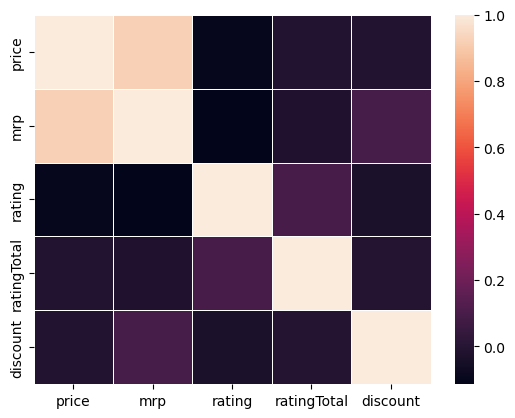

In [44]:
sns.heatmap(df.corr(numeric_only=True),linewidths=0.5, linecolor="white")

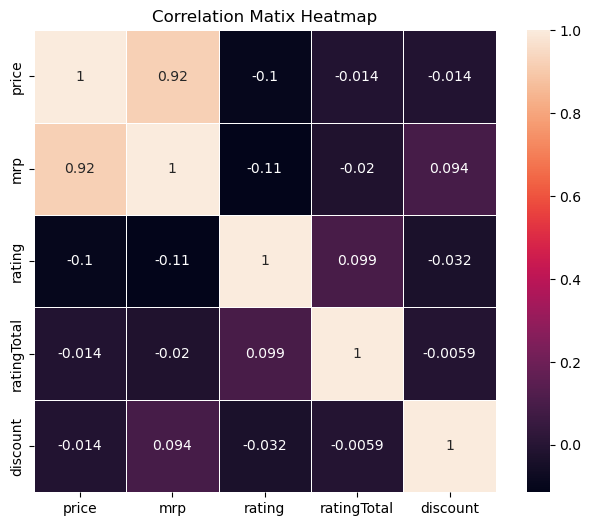

In [46]:
#computing the correlation matrix
correlation_matrix = df.corr(numeric_only=True)


#Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, linewidths=0.5, linecolor="white", annot=True, square=True)

#set the title of heatmap
plt.title('Correlation Matix Heatmap')

#Display the heatmap
plt.show()


**Observation**
-   Here we can see price and MRP have a very high + correlation

In [19]:
name_counts = df['name'].value_counts()
print(name_counts)

name
Men Polo Collar T-shirt                    5644
Gold-Plated Jewellery Set                  5485
Men Typography Printed T-shirt             4326
Printed Round Neck T-shirt                 4055
Men Slim Fit Jeans                         4046
                                           ... 
Empire Tiered Mini Dress                      1
Women Slim Jogger Fit Jeans                   1
Mini Dress With Lace Inserts                  1
Abstract Waistline Dress                      1
Men Checked Slim Fit Cotton Track Pants       1
Name: count, Length: 217738, dtype: int64


In [20]:
#select only top 5 value counts 

top_5_counts = name_counts.head(5)

top_5_counts

name
Men Polo Collar T-shirt           5644
Gold-Plated Jewellery Set         5485
Men Typography Printed T-shirt    4326
Printed Round Neck T-shirt        4055
Men Slim Fit Jeans                4046
Name: count, dtype: int64

/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


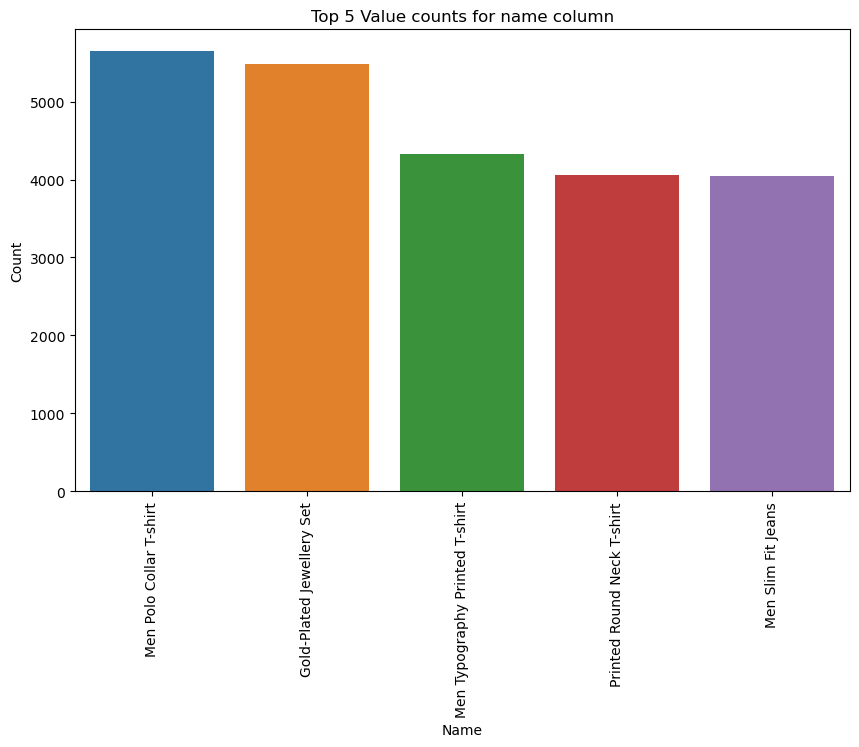

In [22]:
#create a bar plot 

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_counts.index, y=top_5_counts.values)
plt.xticks(rotation = 90)
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Top 5 Value counts for name column')

#diplaying the plot
plt.show()

**The commonly listed product on Myntra are as folows**
-   Men Polo Collar T short 5644
-   Gold-Plated Jewellery Set 5485
-   Men Typography Printed T-shirt 4326
-   Printed Round Neck T-shirt 4055
-   Men Slim Fit Jeans          4046


In [24]:
#checking price column statistics 

df['price'].describe()

count    1.060213e+06
mean     1.536235e+03
std      3.051140e+03
min      2.500000e+01
25%      4.990000e+02
50%      8.110000e+02
75%      1.497000e+03
max      2.575000e+05
Name: price, dtype: float64

/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


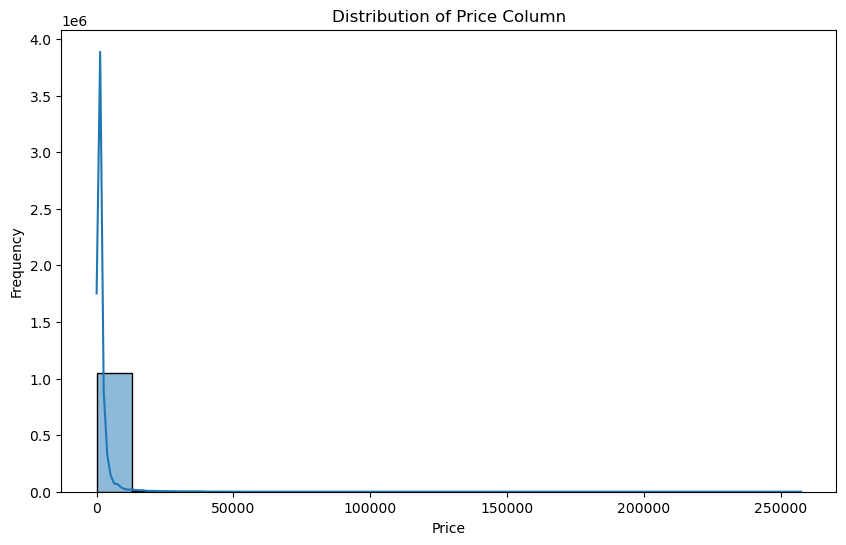

In [25]:
#Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True)


#Set labels and title 
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price Column')


#showing the plot
plt.show()

Let's apply Logarithmic transformation for better understanding of the data distribution

/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


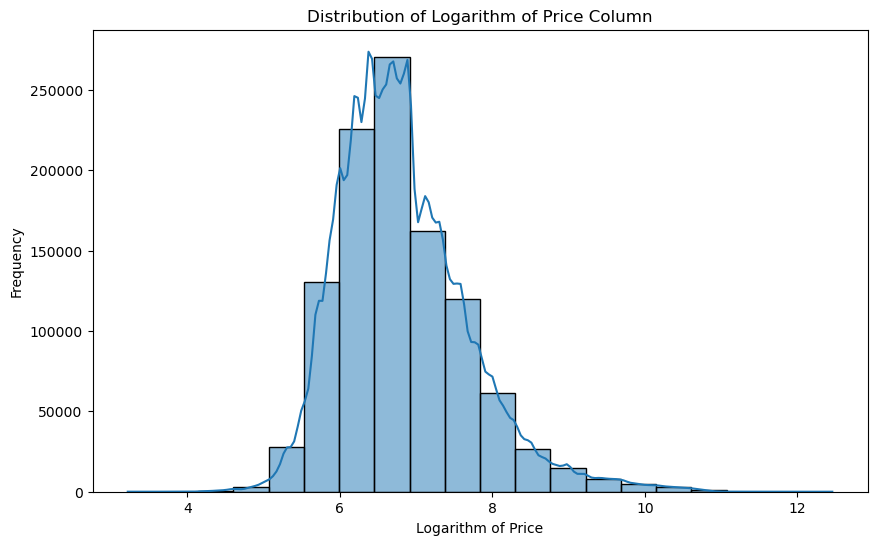

In [26]:
# Apply logarithmic transformation
log_prices = np.log(df['price'])

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(log_prices, bins=20, kde=True)

# Set labels and title
plt.xlabel('Logarithm of Price')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of Price Column')

# Display the plot
plt.show()

/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


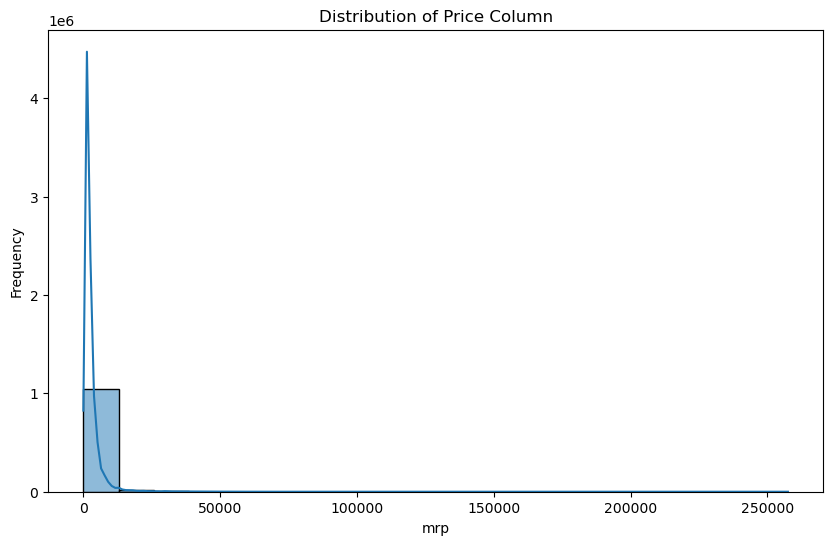

In [27]:
#Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['mrp'], bins=20, kde=True)


#Set labels and title 
plt.xlabel('mrp')
plt.ylabel('Frequency')
plt.title('Distribution of Price Column')


#showing the plot
plt.show()

/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


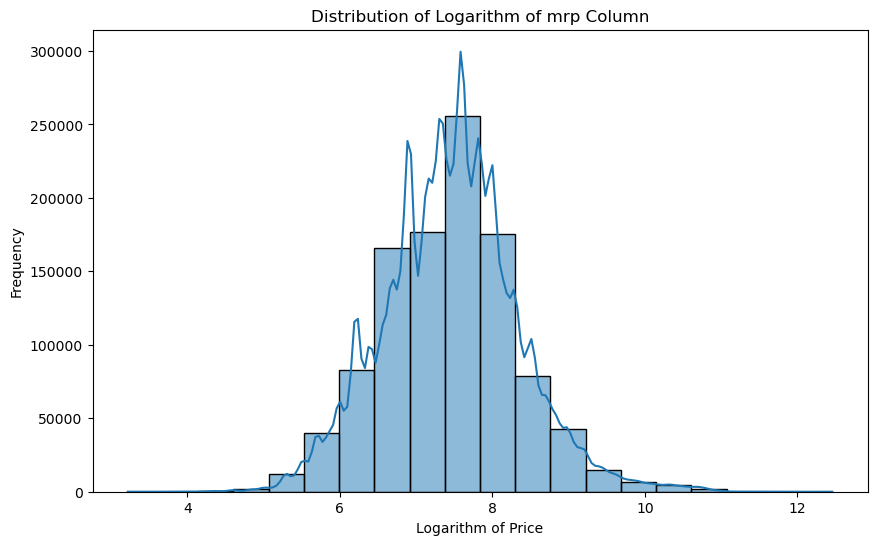

In [29]:
# Apply logarithmic transformation
log_prices = np.log(df['mrp'])

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(log_prices, bins=20, kde=True)

# Set labels and title
plt.xlabel('Logarithm of Price')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of mrp Column')

# Display the plot
plt.show()

/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


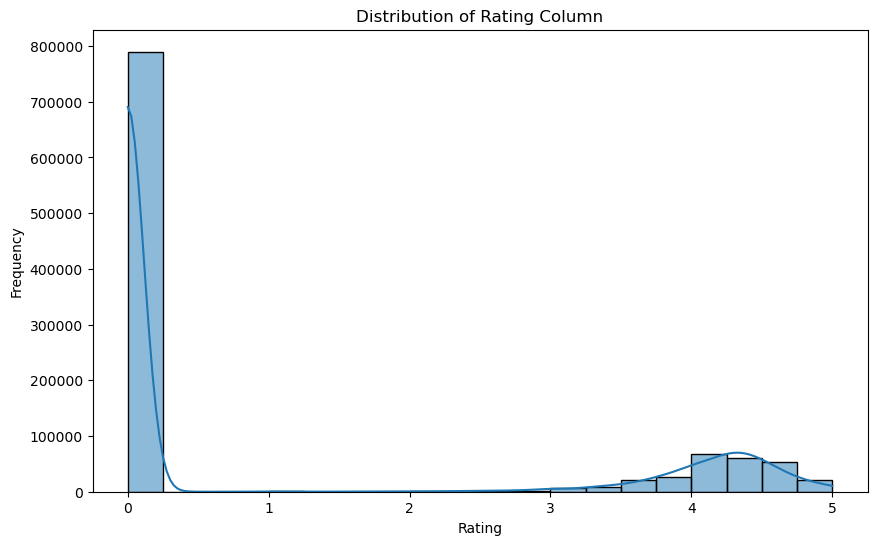

In [30]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Column')

# Display the plot
plt.show()

From the above graph we can assume that most of the product didn't receive any rating and were given a base rating of zero. Therefore, we can exclude the zero rating.

/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


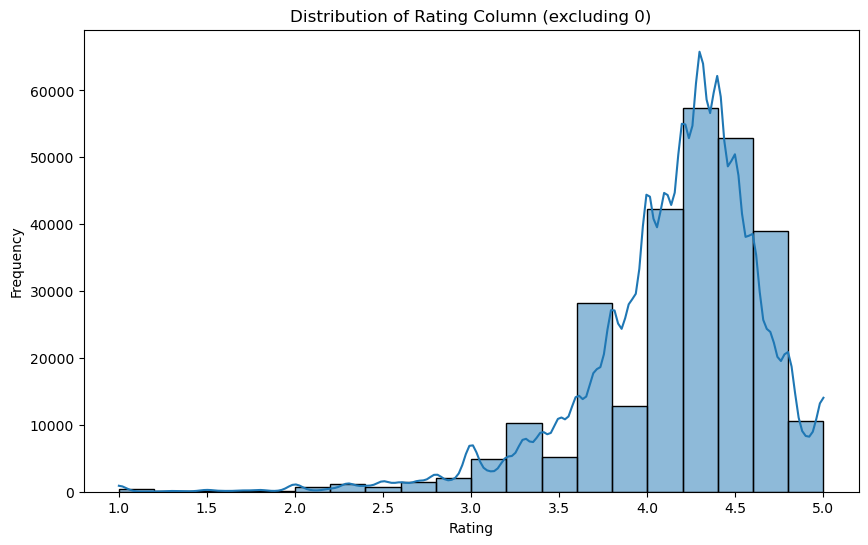

In [31]:
# Filter out the "0" values in the rating column
filtered_ratings = df[df['rating'] != 0]['rating']

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_ratings, bins=20, kde=True)

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Column (excluding 0)')

# Display the plot
plt.show()

**Total Rating**

In [32]:
df['ratingTotal'].describe()

count    1.060213e+06
mean     4.189618e+01
std      7.476645e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e+00
max      7.640000e+04
Name: ratingTotal, dtype: float64

/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


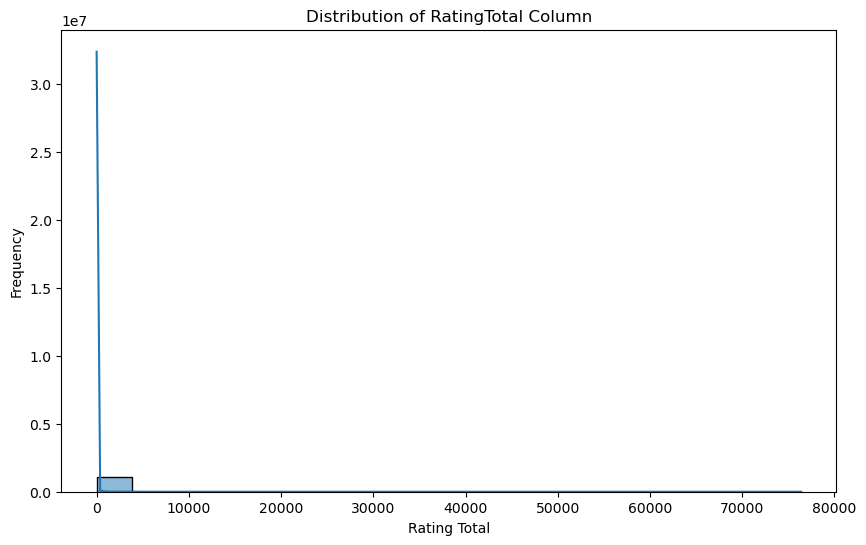

In [33]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['ratingTotal'], bins=20, kde=True)

# Set labels and title
plt.xlabel('Rating Total')
plt.ylabel('Frequency')
plt.title('Distribution of RatingTotal Column')

# Display the plot
plt.show()

/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


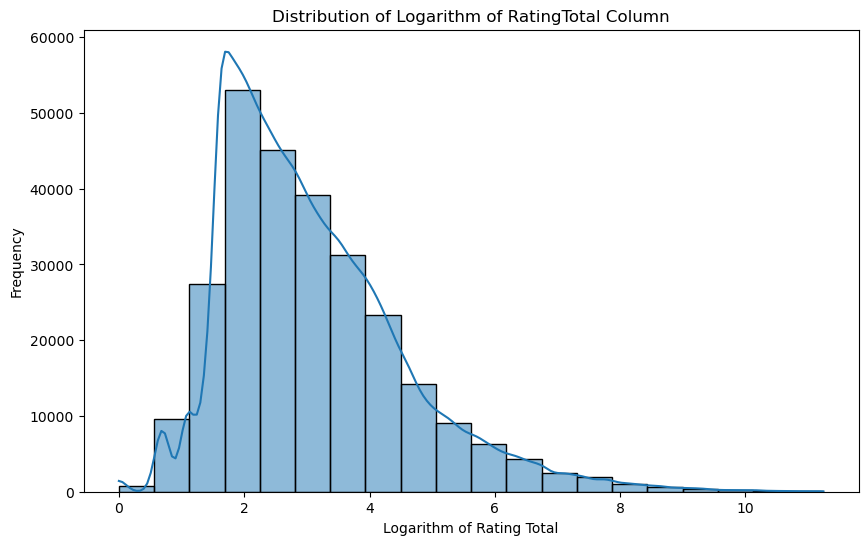

In [34]:
# Apply logarithmic transformation
log_ratingTotal = np.log(df['ratingTotal'])

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(log_ratingTotal, bins=20, kde=True)

# Set labels and title
plt.xlabel('Logarithm of Rating Total')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of RatingTotal Column')

# Display the plot
plt.show()

In [35]:
top_10_products = df.nlargest(10, 'ratingTotal')
print(top_10_products[['name', 'ratingTotal']])

                                         name  ratingTotal
271611            Toner-Lotion-Cream-Lip Balm        76400
375328            Toner-Lotion-Cream-Lip Balm        76400
950168          Men Pack of 2 Printed T-shirt        75100
254775              Unisex Skin Care Gift Set        72700
353233              Unisex Skin Care Gift Set        72700
950167             Pack Of 2 Printed T-shirts        72600
989446             Pack Of 2 Printed T-shirts        72600
990061  Pack Of 2 Printed Pure Cotton T-shirt        72500
88090            Toner-Sunscreen-Lotion-Cream        72400
232773           Sustainable Skin & Hair Care        71300


**Discount**

In [36]:
df['discount'].describe()

count    1.060213e+06
mean     1.496420e+02
std      5.648781e+02
min      0.000000e+00
25%      1.500000e+01
50%      5.000000e+01
75%      6.800000e+01
max      1.999600e+04
Name: discount, dtype: float64

/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


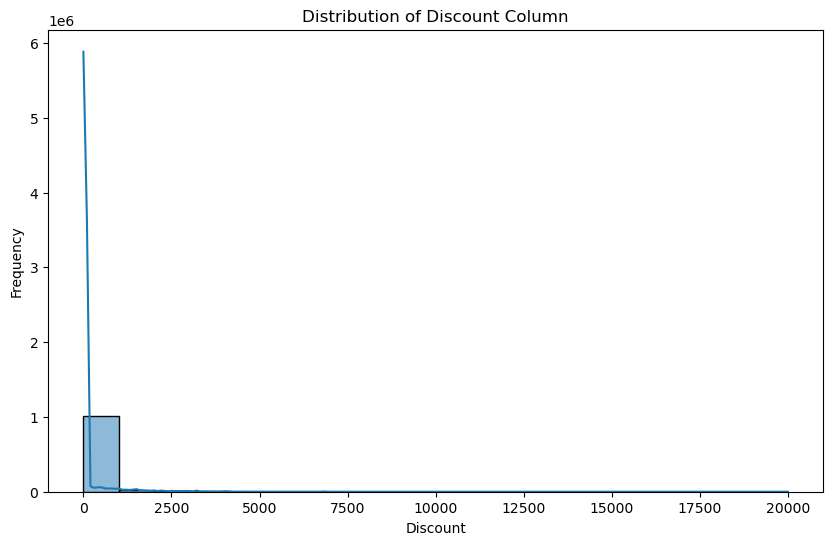

In [37]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['discount'], bins=20, kde=True)

# Set labels and title
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.title('Distribution of Discount Column')

# Display the plot
plt.show()

/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


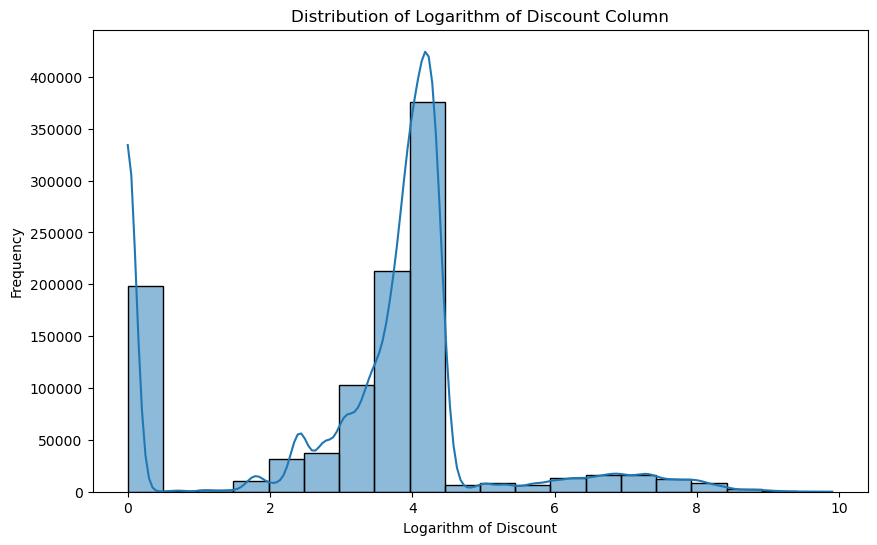

In [38]:
# Apply logarithmic transformation
log_discount = np.log(df['discount'] + 1)  # Adding 1 to avoid log(0)

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(log_discount, bins=20, kde=True)

# Set labels and title
plt.xlabel('Logarithm of Discount')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of Discount Column')

# Display the plot
plt.show()

In [39]:
top_10_products = df.nlargest(10, 'discount')
print(top_10_products[['name', 'discount']])

                                             name  discount
235289                  Gold-Plated Jewellery Set     19996
269783                  Gold-Plated Jewellery Set     19996
706382  Ready to Wear Lehenga Blouse With Dupatta     18501
714474  Ready to Wear Lehenga Blouse With Dupatta     18501
728478                Ready to Wear Lehenga Choli     18501
728486                Ready to Wear Lehenga Choli     18501
729216                Ready to Wear Lehenga Choli     18501
729777                Ready to Wear Lehenga Choli     18501
828270    Floral Printed Pure Silk Ethnic Dresses     18501
881286  Ready to Wear Lehenga Blouse With Dupatta     18501


In [40]:
df.columns

Index(['name', 'price', 'mrp', 'rating', 'ratingTotal', 'discount', 'seller'], dtype='object')

**Seller**

In [41]:
seller_counts = df['seller'].value_counts()
print(seller_counts)

seller
Roadster           10651
H&M                 6667
Puma                6579
max                 6486
Anouk               6158
                   ...  
Auggmin                1
BS AMOR                1
Bodyguard              1
TRU HAIR               1
Zainab chottani        1
Name: count, Length: 5496, dtype: int64


/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/najir/anaconda3/envs/conda_v/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


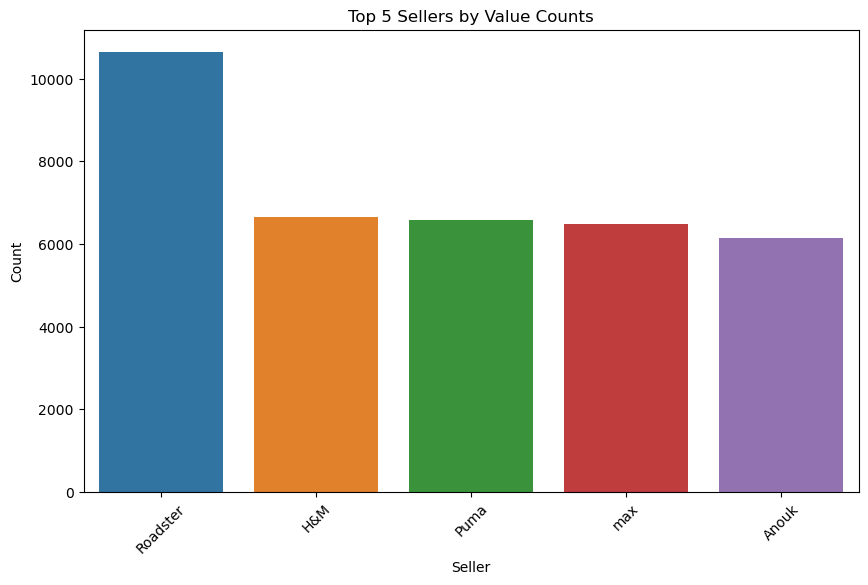

In [42]:
# Get the top 5 sellers by value counts
top_5_sellers = df['seller'].value_counts().head(5)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_sellers.index, y=top_5_sellers.values)

# Set labels and title
plt.xlabel('Seller')
plt.ylabel('Count')
plt.title('Top 5 Sellers by Value Counts')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

**Here are top 5 sellers on Myntra by product listing**
-   Roadster
-   H&M
-   Puma
-   max
-   Anouk

**Highest Rated Product**

In [43]:
top_rated_products = df.sort_values(by=['rating', 'ratingTotal'], ascending=[False, False])
top_rated_products = top_rated_products.head(10)
print(top_rated_products[['name', 'rating', 'ratingTotal']])

                                 name  rating  ratingTotal
180080  Brightening Foaming Face Wash     5.0          264
245742  Brightening Foaming Face Wash     5.0          264
376871  Brightening Foaming Face Wash     5.0          264
379391  Brightening Foaming Face Wash     5.0          264
126865      Multigreens Face Cleanser     5.0          174
128126      Multigreens Face Cleanser     5.0          174
195941      Multigreens Face Cleanser     5.0          174
131946      Soulfood Body Scrub 175 g     5.0           89
199389      Soulfood Body Scrub 175 g     5.0           89
443599      Soulfood Body Scrub 175 g     5.0           89


# Conclusion and Findings

## Data Exploration and Pre-processing:
- The dataset was loaded successfully, and irrelevant columns (`img`, `asin`, `purl`, `id`) were dropped to streamline the analysis.
- No significant missing values were observed in the remaining dataset, ensuring data integrity.

## Exploratory Data Analysis (EDA):
### 1. Correlation Analysis:
- Strong positive correlation was found between 'price' and 'MRP', indicating that these two variables move together.
- Visual representation of the correlation matrix was provided through a heatmap.

### 2. Top Products on Myntra:
- Identified the top 5 most commonly listed products on Myntra, with "Men Polo Collar T-shirt" being the most prevalent.

### 3. Price Distribution Analysis:
- Explored the distribution of 'price' and 'MRP' columns through histograms.
- Applied logarithmic transformation to better understand the skewed distribution.

### 4. Rating Analysis:
- Analyzed the distribution of product ratings, revealing that a significant portion of products had a base rating of zero.
- Filtered out zero ratings to focus on products with actual ratings.

### 5. Total Rating Analysis:
- Examined the distribution of total ratings, providing insights into the overall popularity of products.

### 6. Discount Analysis:
- Investigated the distribution of product discounts, applying logarithmic transformation for a clearer representation.

### 7. Top Sellers on Myntra:
- Identified and visualized the top 5 sellers on Myntra based on the number of product listings.

### 8. Highest Rated Products:
- Presented the top 10 products with the highest ratings and total ratings.

## Overall Conclusions:
- The dataset provides valuable insights into product listings on Myntra, including pricing, ratings, and seller information.
- Products on Myntra exhibit varying degrees of popularity, with diverse offerings from different sellers.
- Strong positive correlation between 'price' and 'MRP' suggests consistent pricing strategies.
- The top-rated products and sellers provide valuable information for both consumers and the platform itself.
- Further analysis, such as customer reviews sentiment analysis, could enhance understanding of customer preferences.

These findings offer a comprehensive overview of the Myntra dataset, providing a foundation for more in-depth analyses and strategic decision-making for the e-commerce platform.
